In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time

import util_functions as fs
import imp
imp.reload(fs)

%matplotlib inline

In [2]:
#Read music sheets - Binary thresholding and resizing
sheets = fs.get_images('./data/test_sheets', resize_factor=1, denoise=False, threshold=200)

>>> Folder : ./data/test_sheets : 14 files
01 : ./data/test_sheets/Sample01.jpg : (1657, 1177)
02 : ./data/test_sheets/Sample02.jpg : (1353, 1174)
03 : ./data/test_sheets/fire.jpg : (3508, 2479)
04 : ./data/test_sheets/hush.jpg : (1100, 850)
05 : ./data/test_sheets/kookaburra.jpg : (1453, 2453)
06 : ./data/test_sheets/mary.jpg : (1288, 2456)
07 : ./data/test_sheets/p1 (1).jpg : (2339, 1653)
08 : ./data/test_sheets/p1.jpg : (2339, 1653)
09 : ./data/test_sheets/p1.png : (1809, 1280)
10 : ./data/test_sheets/p2 (1).jpg : (2339, 1653)
11 : ./data/test_sheets/p2.jpg : (2339, 1653)
12 : ./data/test_sheets/p2.png : (1809, 1280)
13 : ./data/test_sheets/races.jpg : (1600, 1465)
14 : ./data/test_sheets/teapot.jpg : (1101, 851)
>>> Inverse binary thresholding with threshold value 200


In [3]:
sample_image = sheets[6]

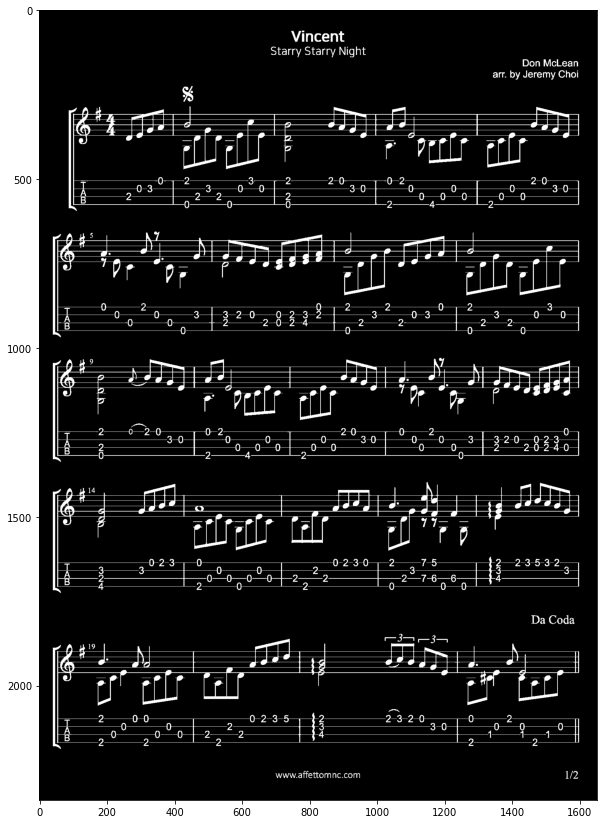

In [4]:
#Show sample
fs.plot_single_image(sample_image, off_axis=False)

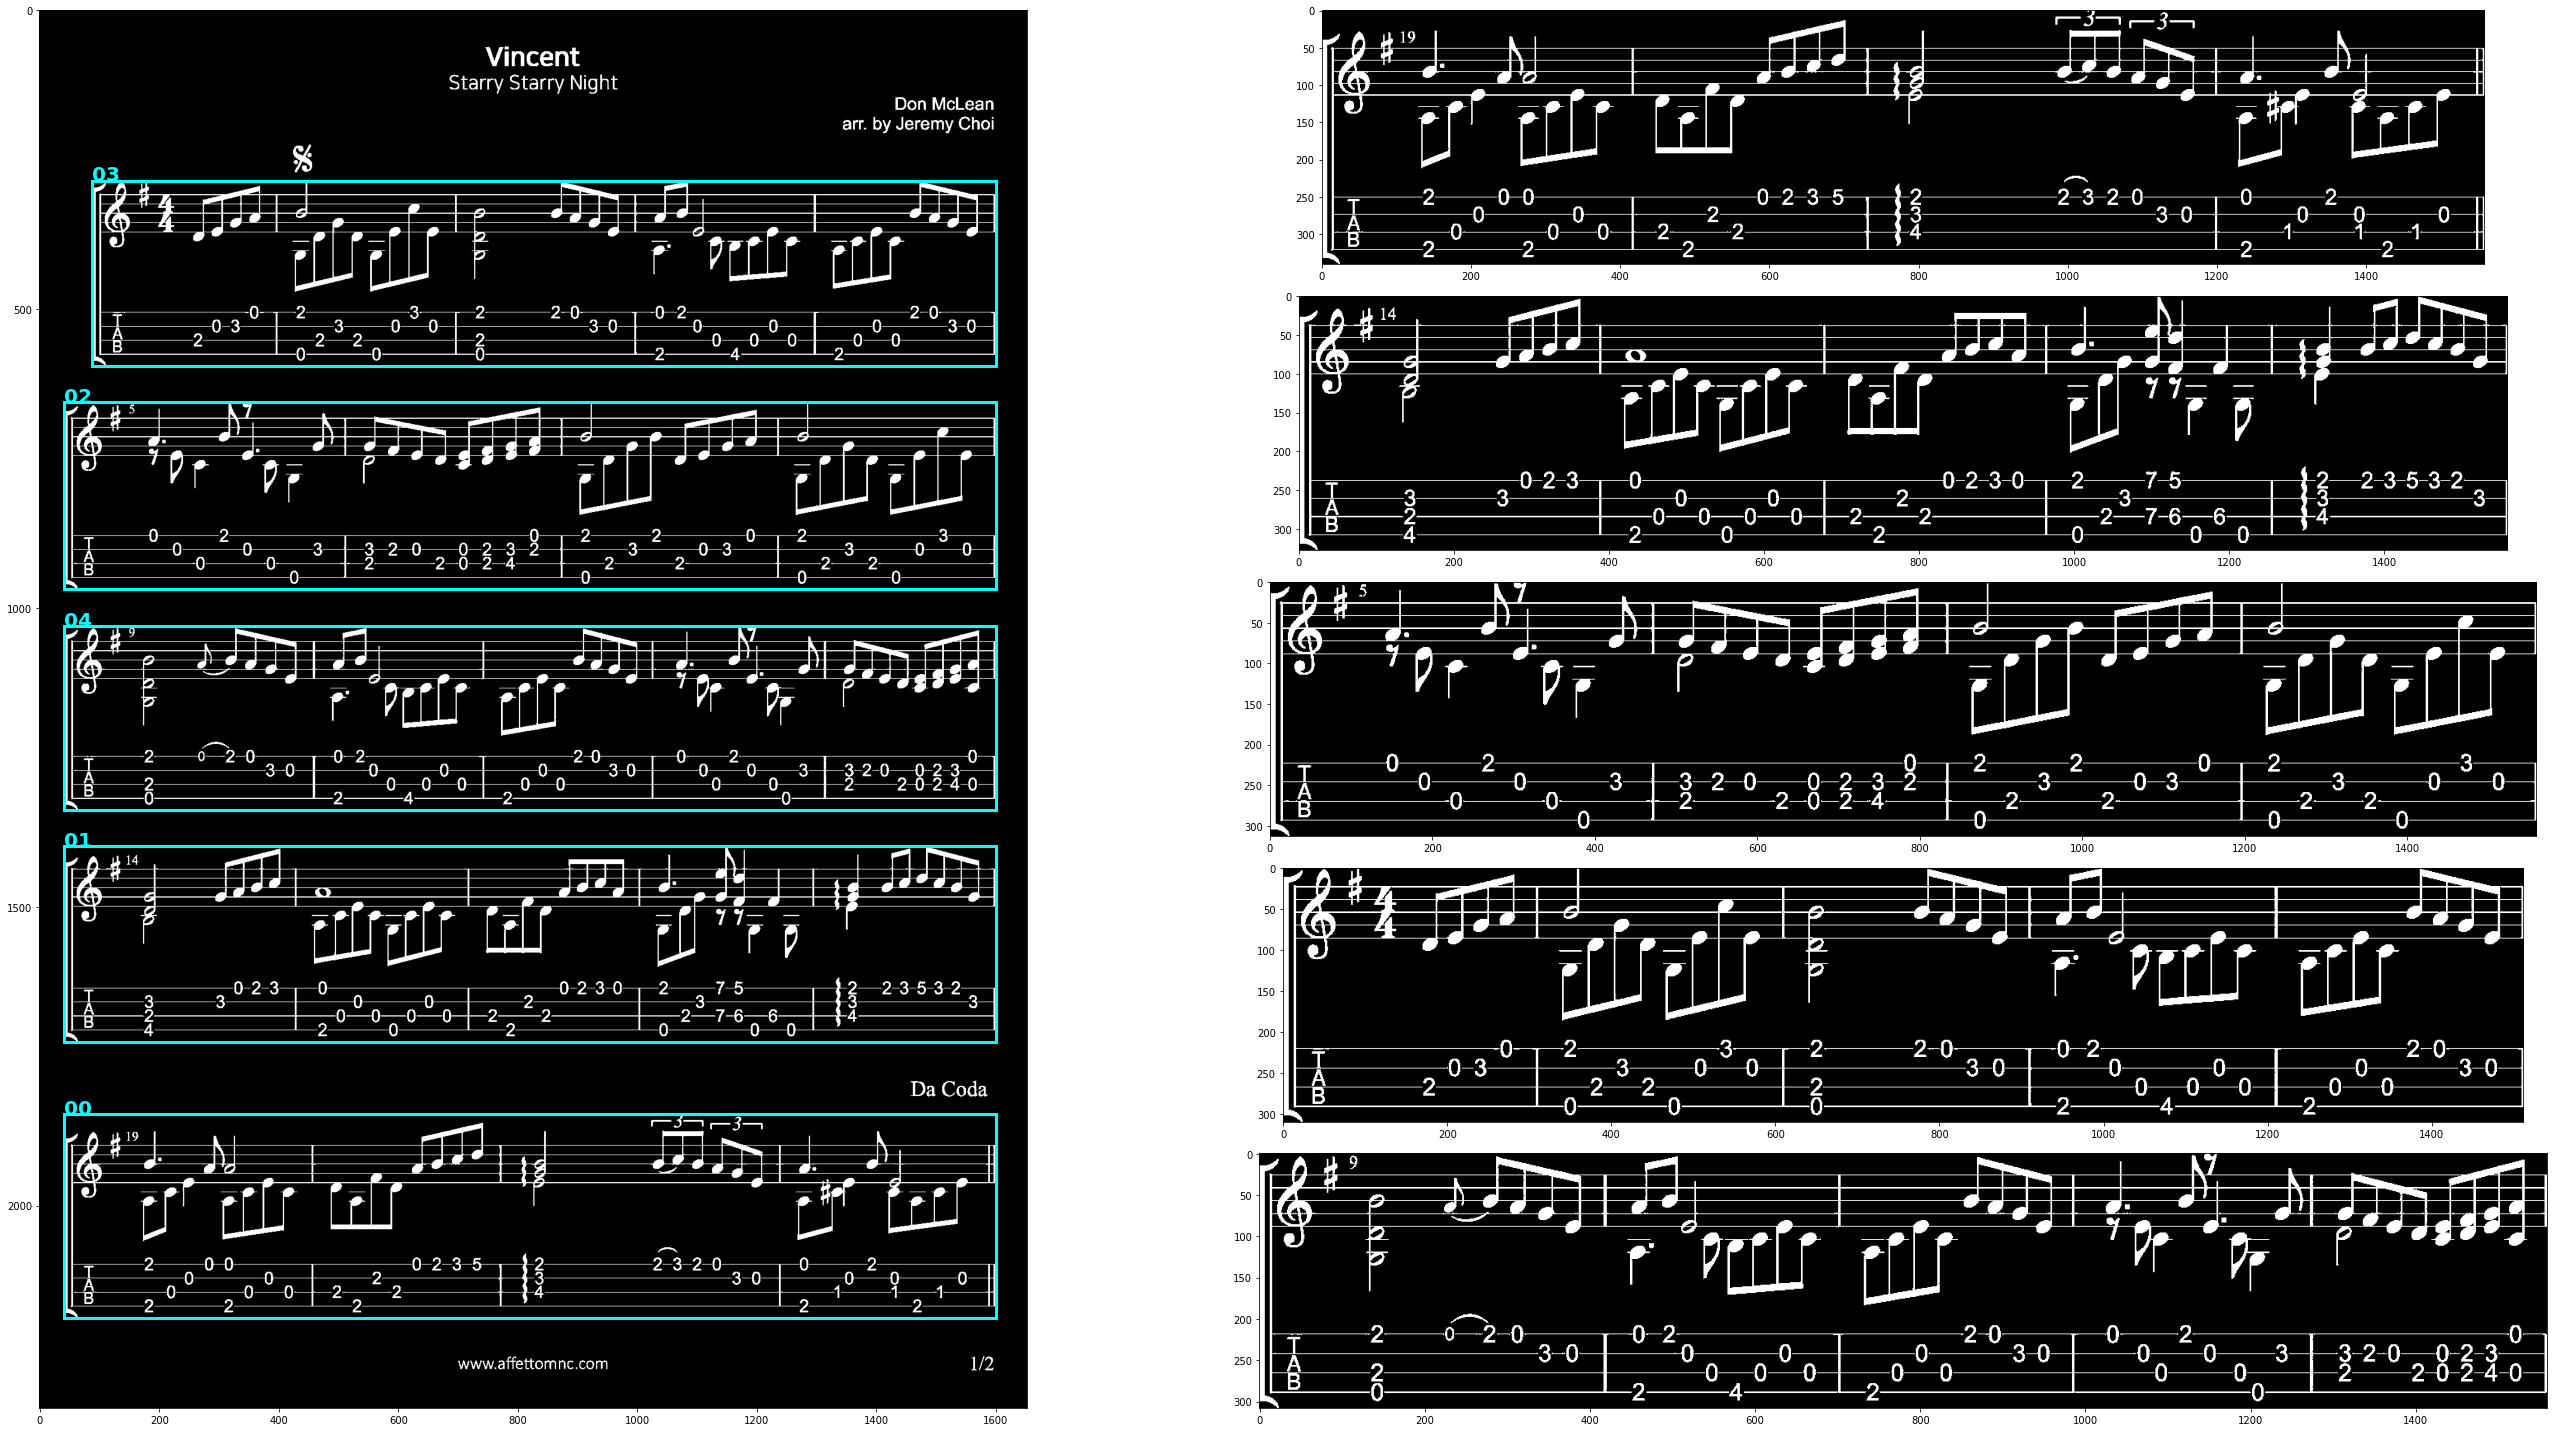

In [5]:
#Get main components of sheet
main_components, pos, _ = fs.get_main_components(sample_image)

#Show sample
import matplotlib.patches as patches

row = len(main_components)

fig = plt.figure(figsize=(40,20))
ax = plt.subplot2grid((row, 2), (0, 0), rowspan=row)
ax.imshow(sample_image, cmap='gray')
for i, (x, y, w, h, area) in enumerate(pos):  #Highlighting
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='cyan', fill=False, linewidth=3))
    ax.text(x, y, f'{i:02d}', color='cyan', fontsize=20, fontweight='bold')

for i in range(len(main_components)):
    ax = plt.subplot2grid((row, 2), (i, 1))
    ax.imshow(main_components[i], cmap='gray')


fig.set_tight_layout(True)
plt.show() 

In [6]:
clef_paths = {
    "treble": [
        "./data/symbols/clef/treble_1.jpg",
        "./data/symbols/clef/treble_2.jpg"
    ],
    "bass": [
        "./data/symbols/clef/bass_1.jpg"
    ]
}

clef_imgs = {
    "treble": [fs.get_images(clef_file, resize_factor=1.0, threshold=200) for clef_file in clef_paths["treble"]],
    "bass": [fs.get_images(clef_file, resize_factor=1.0, threshold=200) for clef_file in clef_paths["bass"]]
}

>>> File : ./data/symbols/clef/treble_1.jpg
01 : ./data/symbols/clef/treble_1.jpg : (155, 60)
>>> Inverse binary thresholding with threshold value 200
>>> File : ./data/symbols/clef/treble_2.jpg
01 : ./data/symbols/clef/treble_2.jpg : (162, 54)
>>> Inverse binary thresholding with threshold value 200
>>> File : ./data/symbols/clef/bass_1.jpg
01 : ./data/symbols/clef/bass_1.jpg : (86, 45)
>>> Inverse binary thresholding with threshold value 200


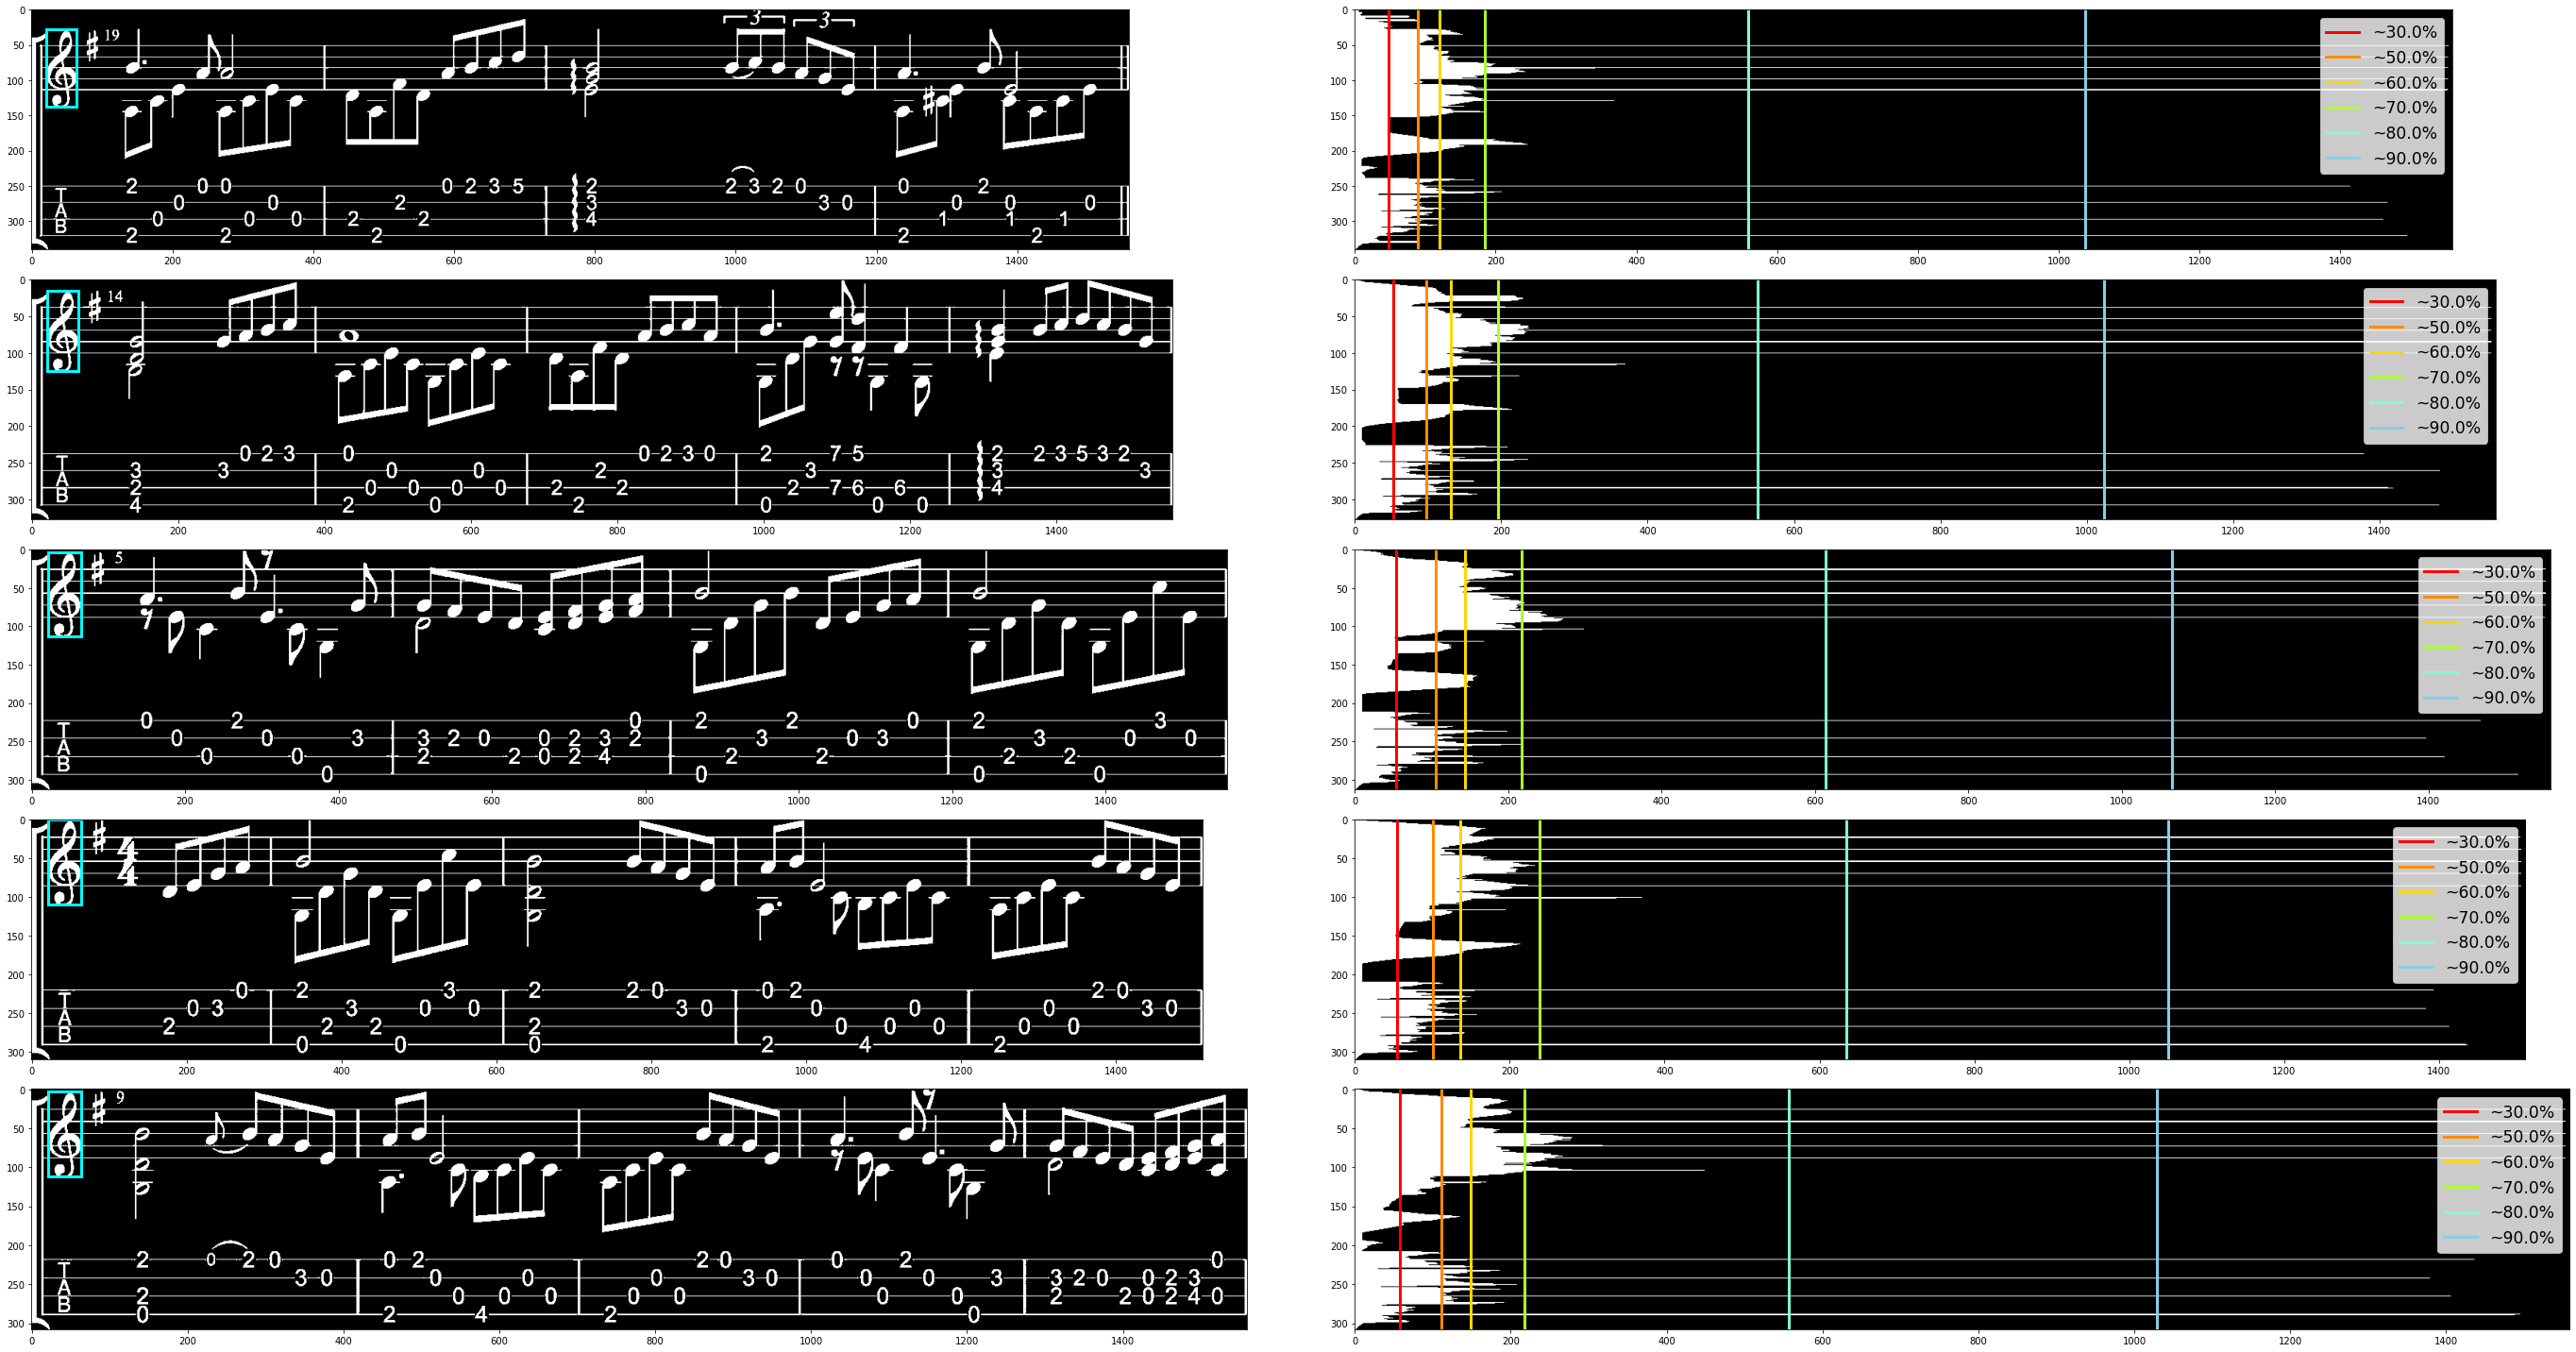

Runtime : 15.91 sec


In [7]:
ts = time.time()

row = len(main_components)
vline_opt = ['red', 'darkorange', 'gold', 'greenyellow', 'aquamarine', 'skyblue']

fig = plt.figure(figsize=(40,20))
for i, component in enumerate(main_components):
    score, scale, idx, shape, template = fs.find_best_match(component, clef_imgs["treble"], np.arange(0.5, 0.9, 0.03), search_area_ratio=3)
    hist_image, hist_data, cum_grid, grid_idx = fs.get_pixel_histogram(component, grid=[0.3, 0.5, 0.6, 0.7, 0.8, 0.9])
    
    ax = plt.subplot2grid((row, 2), (i, 0))
    ax.imshow(main_components[i], cmap='gray')
    ax.add_patch(patches.Rectangle(idx[::-1], *shape[::-1], edgecolor='cyan', fill=False, linewidth=3))
    ax.set_anchor('W')
    
    ax = plt.subplot2grid((row, 2), (i, 1))
    ax.imshow(hist_image, cmap='gray')
    for j, val in enumerate(grid_idx):
        ax.axvline(x=val, color=vline_opt[j], label=f'~{100*cum_grid[j]:.1f}%', linewidth=3)
    ax.legend(fontsize='xx-large')
    ax.set_anchor('W')

fig.set_tight_layout(True)
plt.show() 

tf = time.time()
print(f'Runtime : {tf-ts:.2f} sec')